['./checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.2/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.8/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.5/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.7/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.9/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.4/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.6/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.75/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.3/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.1/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta1.0/metadata.json']
[[1.58739765e+04 7.

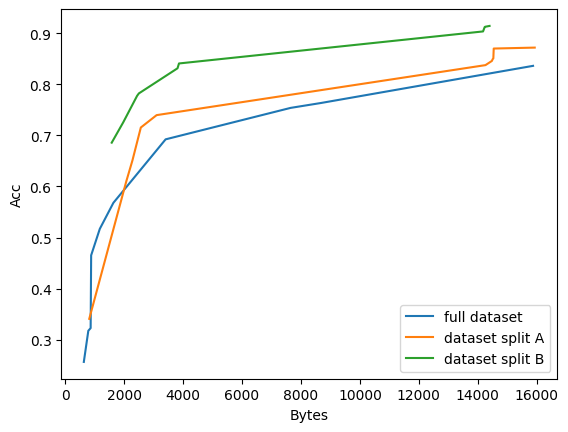

In [124]:
#rsync -v -r --info=progress2 -f '+ *.json' -f '- *.pth.tar' juliano@iasl-mlserver2021.ics.uci.edu:/home/juliano/workspace/split_mobilenetv3/checkpoints .

import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import scipy


def plot_curve(files, name=""):
    print(files)
    acc = []
    rate = []
    for f in files:
        with open(f, "r") as fp:
            j = json.load(fp)
            if 'best_top1' in j:
                acc.append(j['best_top1'])
                rate.append(j['best_bytes'])
    
    data = np.array([rate, acc])
    data[1] = data[1]/100
    
    print(data)
    data.sort()
    
    print(data)
    
    plt.plot(data[0], data[1], label=name)

files = glob.glob('./checkpoints/supervised/pets_*/metadata.json')
plot_curve(files, name='full dataset')

files = glob.glob('./checkpoints/supervised_a2/pets_*/metadata.json')
plot_curve(files, name='dataset split A')

files = glob.glob('./checkpoints/supervised_b2/pets_*/metadata.json')
plot_curve(files, name='dataset split B')

plt.xlabel("Bytes")
plt.ylabel("Acc")
plt.legend()

[[3047.942028985507, 73.3442329662507], [2828.289855072464, 72.90814668120464], [2674.2608695652175, 71.62714359473715], [2411.246376811594, 70.70046084412569], [2200.695652173913, 64.75878768384408], [2124.521739130435, 63.64131769038377], [2114.4927536231885, 62.66012318721094], [2099.4202898550725, 61.05205610747817], [2024.6376811594203, 60.043607320341046], [2028.231884057971, 59.06241350025792], [1921.6811594202898, 55.21940457772156], [1878.840579710145, 54.53802008016716], [1874.7246376811595, 54.29272138731263], [1890.2028985507247, 53.85663585085803], [1974.0289855072465, 53.14799555656077], [1889.3333333333333, 52.521121470341406], [1859.8260869565217, 50.83128776144806], [1813.391304347826, 50.83128773961414], [1875.7101449275362, 50.831288188769015], [1847.1884057971015, 50.831288029693326]]
[[2031.3846153846155, 64.86733520870784], [1936.7692307692307, 62.71729037746419], [1787.076923076923, 60.567244876118174], [1892.7692307692307, 58.234216346287006], [1555.846153846153

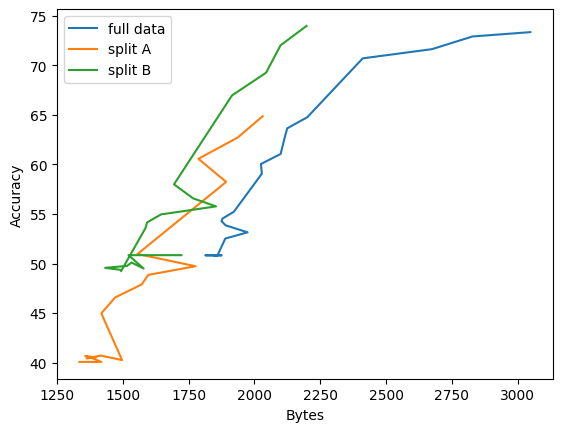

In [13]:
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import scipy

def plot_summary(f, label=""):
    with open(f, "r") as fp:
        a = json.load(fp)
        data = []
        for k, v in a.items():
            data.append([v["val_bytes"], v["val_top1"]])
        print(data)
        data = np.array(data)
        plt.plot(data.T[0], data.T[1], label=label)



plot_summary('../checkpoints/test/pets_gain_bottleneck_default/eval_summary.json', "full data")
plot_summary('../checkpoints/test/pets_a2_gain_bottleneck_a2_default/eval_summary.json', "split A")
plot_summary('../checkpoints/test/pets_b2_gain_bottleneck_b2_default/eval_summary.json', "split B")

plt.xlabel("Bytes")
plt.ylabel("Accuracy")

plt.legend()
